# TSNE (t-distributed Stohastic Neighbor Embedding)

Джефри Хинтон не просто сказал цитату из эпирафа к этой тетрадке, но и вместе со своим аспирантом, в 2008 году, придумал [новый методв изуализации данных.](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) Основная идея метода состоит в поиске отображения из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

Попробуем взять данные о рукописных цифрах и визуализируем их с помощью PCA.

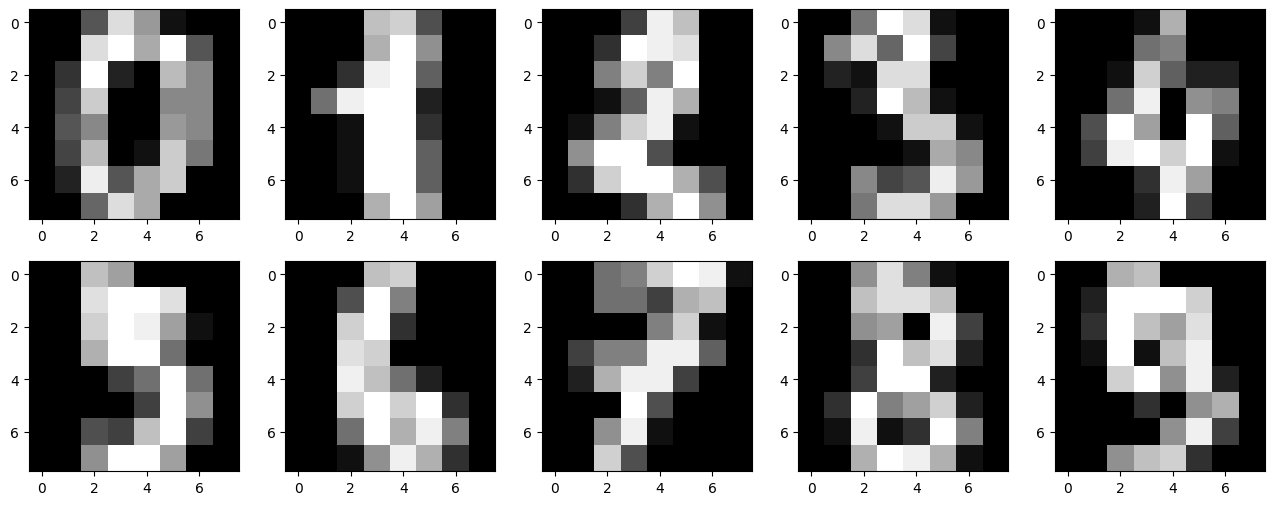

In [5]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

digits = load_digits()

X = digits.data
y = digits.target

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

In [2]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
X.shape, y

((1797, 64), array([0, 1, 2, ..., 8, 9, 8]))

Получается, размерность признакового пространства здесь – 64. Но давайте снизим размерность всего до 2 и увидим, что даже на глаз рукописные цифры неплохо разделяются на кластеры.

<ipython-input-6-6a6f6b750a6c>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


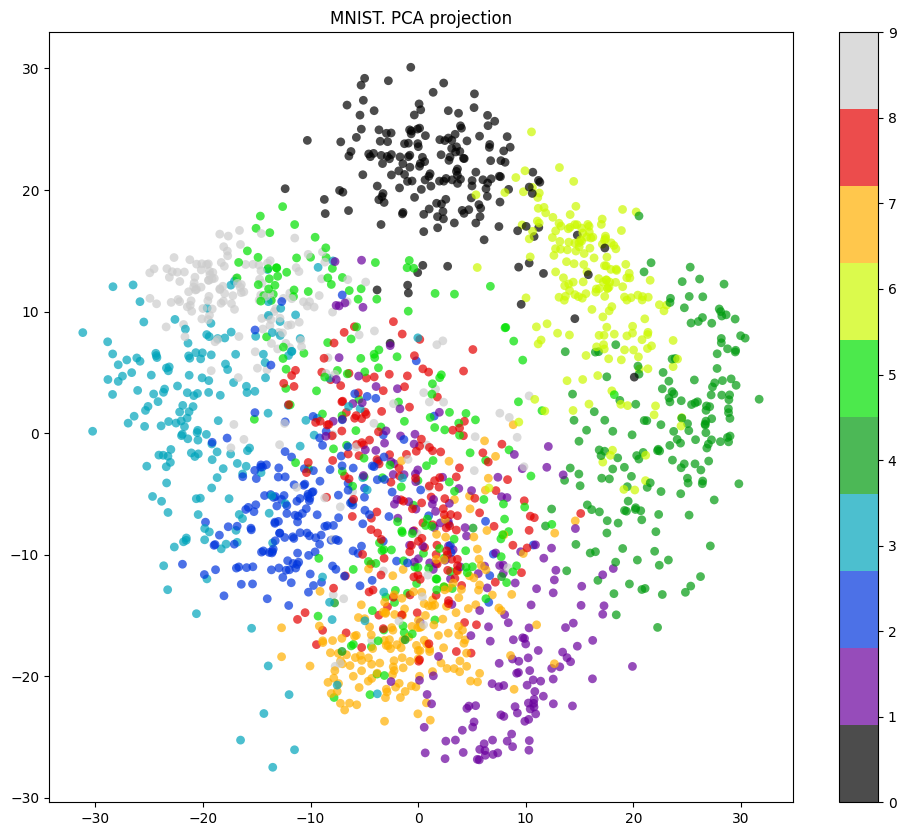

In [6]:
model_pca = PCA(n_components=2)
X_reduced = model_pca.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

Попробуем сделать то же самое с помощью t-SNE. Картинка получится лучше, так как у PCA есть существенное ограничение - он находит только линейные комбинации исходных признаков (если не добавить какое-нибудь ядро).  Внутри sklearn есть реализация TSNE, но она не такая эффективная как библиотека [MulticoreTSNE,](https://github.com/DmitryUlyanov/Multicore-TSNE) в которой метод можно распараллелить.

In [11]:
# !pip install MulticoreTSNE

In [12]:
# from MulticoreTSNE import MulticoreTSNE as TSNE

# tsne = TSNE(n_jobs=4, perplexity=30, random_state=42)
# X_tsne = tsne.fit_transform(X)

# plt.figure(figsize=(12,10))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
#             edgecolor='none', alpha=0.7, s=40,
#             cmap=plt.cm.get_cmap('nipy_spectral', 10))

# plt.colorbar()
# plt.title('MNIST. t-SNE projection');

In [9]:
from sklearn.manifold import TSNE

#Снижение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

У метода есть параметр `Perplexity`, который отвечает за то, насколько сильно точки могут разлететься друг от друга.

<ipython-input-10-625a5f15d10b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


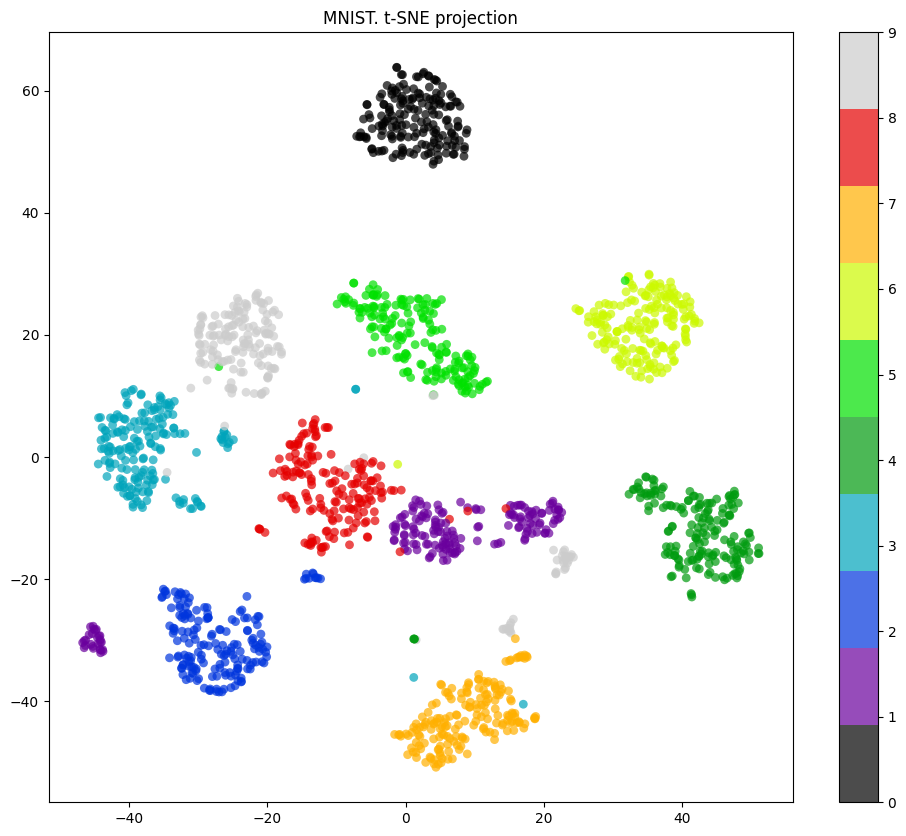

In [10]:
# tsne = TSNE(n_jobs=4, perplexity=2, random_state=42)
# X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.title('MNIST. t-SNE projection');

Итоговая картинка может сильно поменяться при изменении `random_state`, это усложняет интерпретацию. В целом, по таким картинкам не стоит делать далеко идущих выводов – не стоит гадать по кофейной гуще.

В 2018 году был предложен ещё один алгоритм нелинейного снижения размерности, [UMAP.](https://umap-learn.readthedocs.io/en/latest/) Он похож на TSNE, но работает быстрее и более эффективен.

- [статья](https://habr.com/ru/company/io/blog/265089/) "Как подобрать платье с помощью метода главных компонент"
- [Q&A Разбор PCA с интуицией и примерами](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
- [Distillpub о TSNE](https://distill.pub/2016/misread-tsne/)
- [Подробнее про UMAP](https://pair-code.github.io/understanding-umap/)